# 1. 가장 빠른 길 찾기

## 가장 빠르게 도달하는 방법

최단 경로: 말 그대로 가장 짧은 경로를 찾는 기법

각 지점은 노드로 표현되고 연결된 도로는 간선으로 표현

## 다익스트라 최단 경로 알고리즘

그래프에서 여러 개의 노드가 있을 때, 특정한 노드에서 출발하여 다른 노드로 가는 각각의 최단 경로를 구해주는 알고리즘

음의 간선이 없을 때 정상적으로 동작

그리디 알고리즘으로 분류  
매번 '가장 비용이 적은 노드'를 선택해서 임의의 과정을 반복하기 때문

- 원리  
    1. 출발 노드를 설정  
    2. 최단 거리를 초기화  
    3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택  
    4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신  
    5. 3,4번 반복

1번 노드에서 다른 노드로 가는 최단 거리 구하는 문제를 생각  
처음 초기 상태에서는 다 무한으로 설정  
`int(1e9)`로 초기화

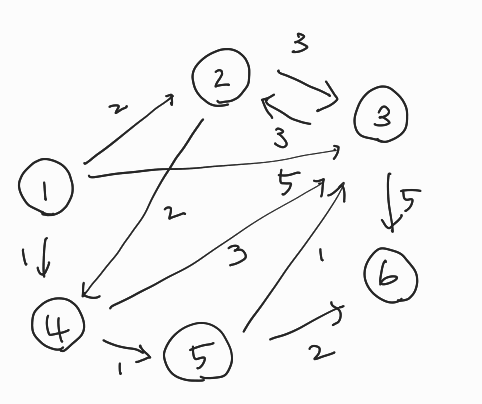

1번 노드를 거쳐 다른 노드로 가는 비용 계산

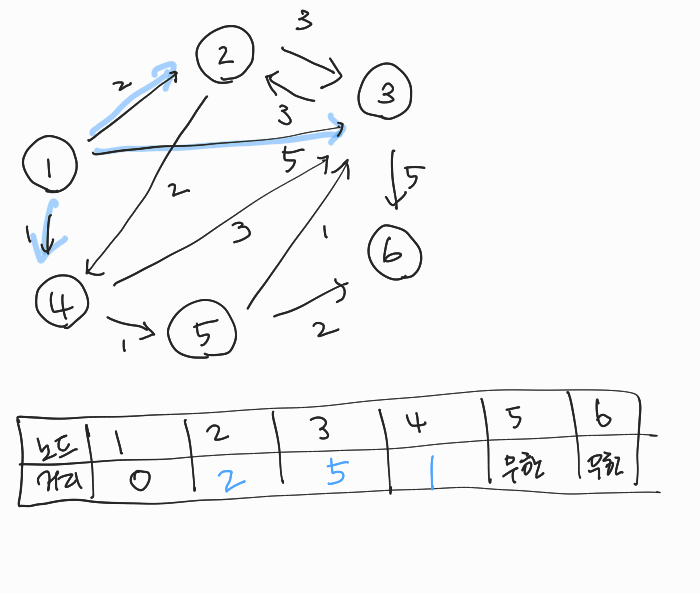

짧은 노드는 4가 됨

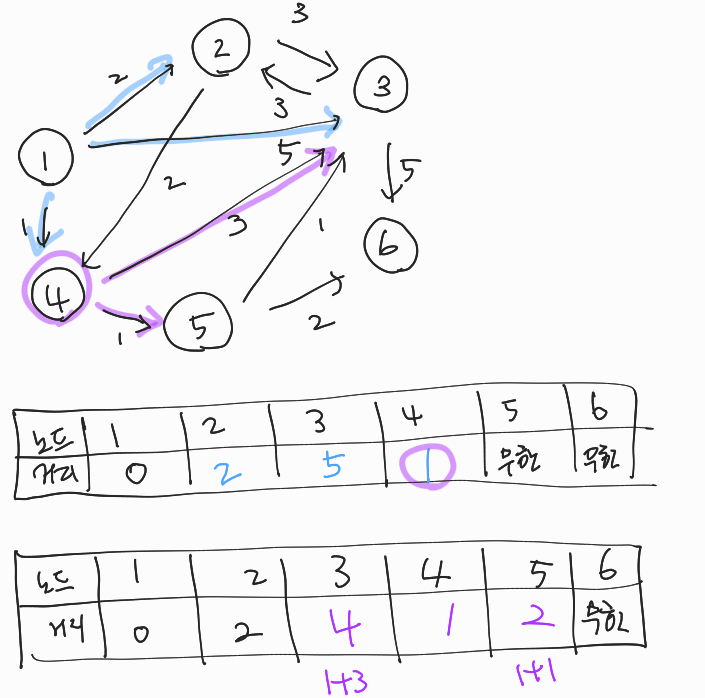

2,5,3,6노드도 반복

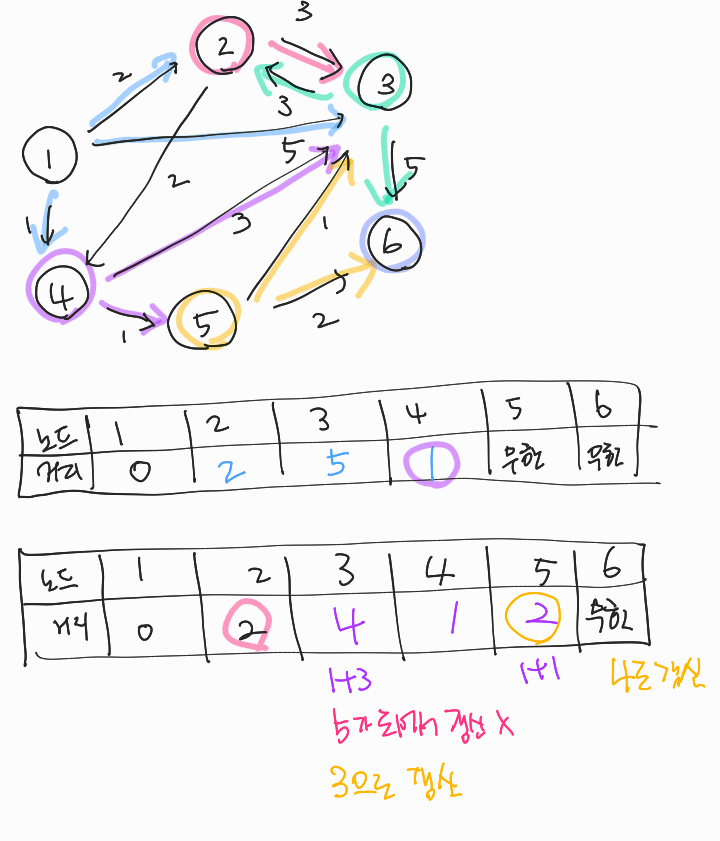

1. 간단한 다익스트라 알고리즘

In [3]:
import sys
INF = int(1e9) 

In [16]:
n, m = map(int,input().split())
start = int(input())

graph = [[] for i in range(n + 1)]
visited = [False] * (n + 1)
distance = [INF] * (n + 1)

for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))

def get_smallest_node():
    min_value = INF
    index = 0 
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    for i in range(n - 1):
        now = get_smallest_node()
        visited[now] = True
        for j in graph[now]:
            cost = distance[now] + j[1]
            if cost < distance[j[0]]:
                distance[j[0]] = cost

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2


In [17]:
dijkstra(start)

for i in range(1, n + 1):
    if distance[i] == INF:
        print("INFINITY")
    else:
        print(distance[i])

0
2
3
1
2
4


2. 개선된 다익스트라 알고리즘

간단한 다익스트라 알고리즘은 '최단 거리가 가장 짧은 노드'를 찾기 위해서 매번 최단 거리테이블을 선형적으로 탐색해야 함  
그래서 힙을 사용하면 조금 더 빨라짐

- 힙  
힙은 큐를 구현하기 위해 사용하는 자료구조 중 하나

(거리:0, 노드:1)->  
(거리:1, 노드:4),(거리:2, 노드:2),(거리:5, 노드:3)->  
(거리:2, 노드:2),(거리:2, 노드:5),(거리:4, 노드:3),(거리:5, 노드:3)->
(거리:2, 노드:5),(거리:4, 노드:3),(거리:5, 노드:3)->  
(거리:3, 노드:3),(거리:4, 노드:3),(거리:4, 노드:6),(거리:5, 노드:3)->  
(거리:4, 노드:3),(거리:4, 노드:6),(거리:5, 노드:3)->  
(거리:4, 노드:6),(거리:5, 노드:3)->  
(거리:5, 노드:3)

In [14]:
import heapq
import sys
INF = int(1e9)

n, m = map(int, input().split())
start = int(input())
graph = [[] for i in range(n + 1)]
distance = [INF] * (n + 1)

for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))

def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q:
        dist, now = heapq.heappop(q)
        if distance[now] < dist:
            continue
        for i in graph[now]:
            cost = dist + i[1]
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2


In [15]:
dijkstra(start)

for i in range(1, n + 1):
    if distance[i] == INF:
        print("INFINITY")
    else:
        print(distance[i])

0
2
3
1
2
4


## 플로이드 워셜 알고리즘

모든 지점에서 다른 모든 지점까지의 최단 경로를 모두 구해야 할 때

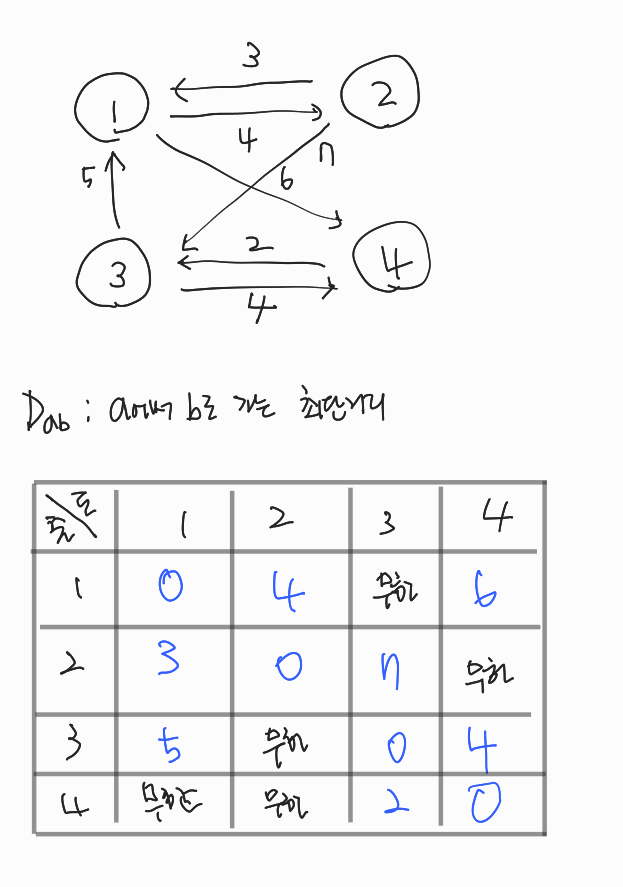

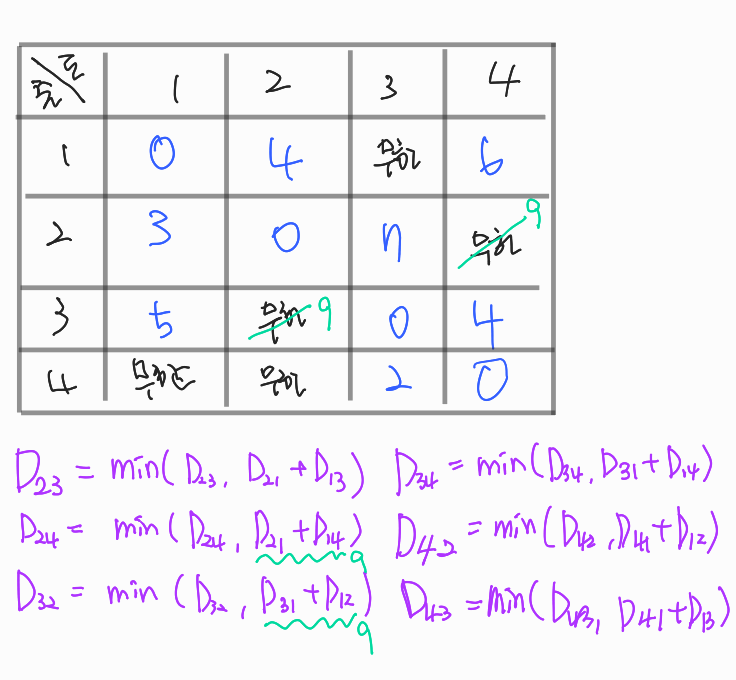

2번 노드 계산

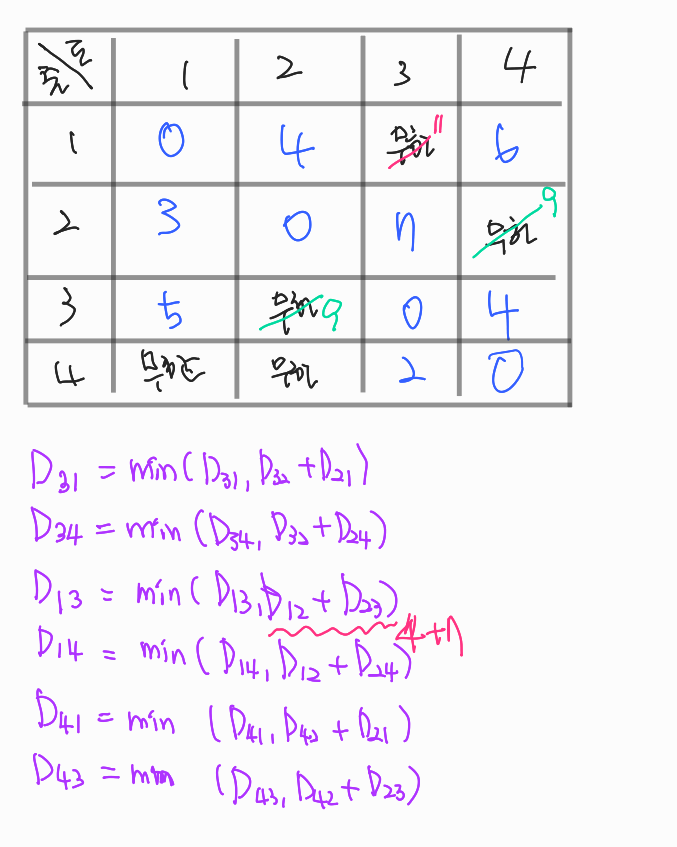

3번 노드 계산

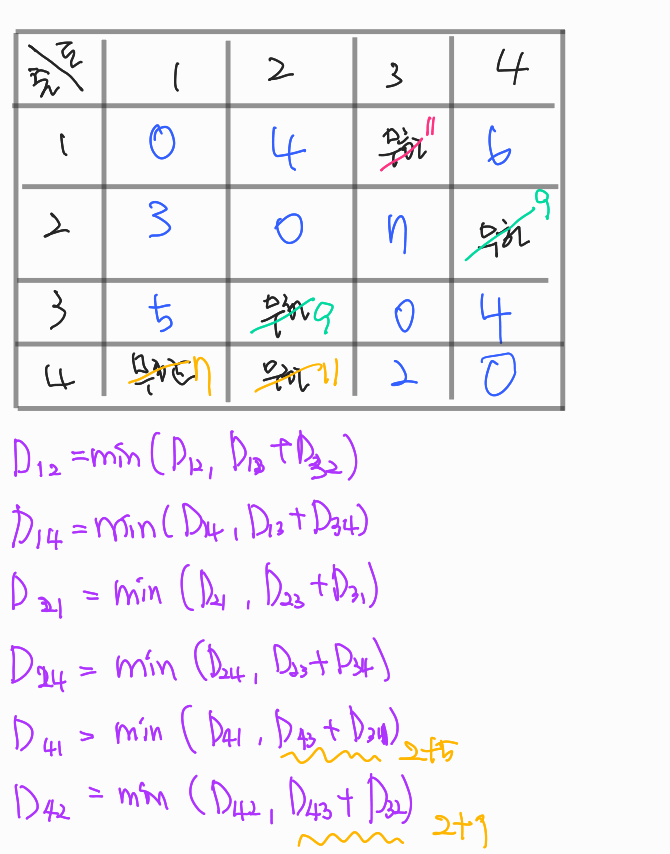

4번 노드 계산

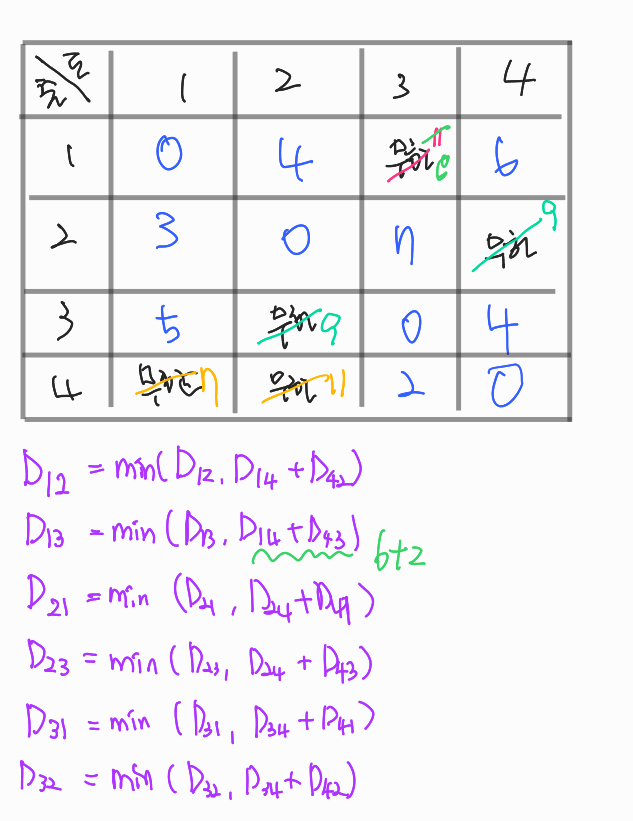

In [3]:
INF = int(1e9)

n = int(input())
m = int(input())
graph = [[INF] * (n + 1) for _ in range(n + 1)]

for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a][b] = c

for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2


In [4]:
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if graph[a][b] == 1e9:
            print("INFINITY", end=" ")
        else:
            print(graph[a][b], end=" ")
    print()


0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


# 2. 실전 문제 - 미래도시

공중 미래 도시에는 1번부터 N번까지의 회사가 있음  
특정 회사끼리 서로 도로를 통해 연결되어 있음  
판매원 A는 1번 회사에 위치해 있고 X번 회사에 방문해 물건을 판매하고자 함

회사끼리 연결된 다리를 통해서만 이동 가능(양방향 가능)  
그런데 A가 소개팅을 해야하는데 소개팅 상대는 K번 회사에 존재  
그래서 A는 1->k->x로 가는 것이 목표  
커피 마시는 시간은 고려하지 않음

N=5  
X=4  
K=5  
도로: (1,2),(1,3),(1,4),(2,4),(3,4),(3,5),(4,5)  
A가 1-3-5-4로 이동하면 총 3만큼의 시간으로 이동 가능